### 1. Import and Clean data

In [21]:
# add packages
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install statsmodels

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
# try change
import pandas as pd
import numpy as np
from sklearn import preprocessing

import seaborn as sb

import statsmodels.api as sm
from sklearn.metrics import r2_score
%matplotlib inline

#data = pd.read_pickle('player_stats_year_wise.pkl')
#data
data1617 = pd.read_pickle('tfa_working_ver_1_2016-17')
data1718 = pd.read_pickle('tfa_working_ver_1')
data1819 = pd.read_pickle('tfa_working_ver_1_2018-19')
data1617

,player_rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,turnovers,personal_fouls,points_per_game,year,salary,team_id,new_pos,team_points,team,team_rank
0,58,aaron brooks,PG,32,65,0,13.8,1.9,4.6,0.403,...,1.0,1.4,5.0,2017,2700000.0,IND,back,0.512,Indiana Pacers,13
1,157,aaron gordon,SF,21,80,72,28.7,4.9,10.8,0.454,...,1.1,2.2,12.7,2017,4351320.0,ORL,front,0.354,Orlando Magic,26
2,181,aaron harrison,SG,22,5,0,3.4,0.0,0.8,0.000,...,0.0,0.4,0.2,2017,375579.0,CHO,back,0.439,Charlotte Hornets,20
3,352,adreian payne,PF,25,18,0,7.5,1.3,3.0,0.426,...,0.4,1.8,3.5,2017,2022240.0,MIN,front,0.378,Minnesota Timberwolves,24
4,170,aj hammons,C,24,22,0,7.4,0.8,1.9,0.405,...,0.5,1.0,2.2,2017,650000.0,DAL,front,0.402,Dallas Mavericks,22
5,203,al horford,C,30,68,68,32.3,5.6,11.8,0.473,...,1.7,2.0,14.0,2017,26540100.0,BOS,front,0.646,Boston Celtics,4
6,221,al jefferson,C,32,66,1,14.1,3.6,7.1,0.499,...,0.5,1.9,8.1,2017,10230179.0,IND,front,0.512,Indiana Pacers,13
7,12,alan anderson,SF,34,30,0,10.3,1.0,2.7,0.375,...,0.2,1.2,2.9,2017,1315448.0,LAC,front,0.622,Los Angeles Clippers,8
8,464,alan williams,C,24,47,0,15.1,2.9,5.7,0.517,...,0.8,2.7,7.4,2017,874636.0,PHO,front,0.293,Phoenix Suns,29
9,65,alec burks,SG,25,42,0,15.5,2.4,5.9,0.399,...,0.8,1.2,6.7,2017,10154495.0,UTA,back,0.622,Utah Jazz,7


In [11]:
def data_clean(data):
    df = data.set_index(data.iloc[:,1]).drop(columns = 'player')
    ori_factors = df.loc[:,['games', 'games_started','min_per_game','field_goals_pct','3points_pct','2points_pct', 'efg_pct','free_throws_pct','trb','assists', 'steals', 'blocks', 'turnovers', 'personal_fouls','points_per_game', 'team_points']].dropna()
    factors = pd.DataFrame(preprocessing.scale(ori_factors))
    factors.columns = ori_factors.columns
    factors.index = ori_factors.index
    return factors

def salary_clean(data):
    df = data.set_index(data.iloc[:,1]).drop(columns = 'player').dropna()
    salary = df.ix[:]['salary']
    salary = pd.DataFrame(preprocessing.scale(salary))
    salary.index = df.index
    return salary, df.ix[:]['salary']

def salary_delta(salary, new_salary):
    df = pd.concat([new_salary, salary],axis = 1).dropna()
    delta = df.iloc[:,0] - df.iloc[:,1]
    return delta

In [12]:
factors1617 = data_clean(data1617)
factors1718 = data_clean(data1718)
factors1819 = data_clean(data1819)

(salary17, ori_salary17) = salary_clean(data1617)
(salary18, ori_salary18) = salary_clean(data1718)
salary_delta18 = salary_delta(ori_salary17, ori_salary18)
# salary_delta18
factors1718

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


,games,games_started,min_per_game,field_goals_pct,3points_pct,2points_pct,efg_pct,free_throws_pct,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,team_points
player,,,,,,,,,,,,,,,,
aaron brooks,-1.219021,-0.958340,-1.863683,-0.613962,0.315900,-0.646027,-0.371548,-0.224760,-1.388625,-0.844684,-1.187849,-1.065241,-1.168068,-1.326531,-1.223351,0.492214
aaron gordon,-0.021951,0.974543,1.327611,-0.221624,0.162404,-0.006567,-0.159076,-0.485125,1.750613,0.101063,0.703461,0.963553,0.680770,0.165224,1.363532,-1.346471
abdel nader,-0.482362,-0.958340,-1.272703,-1.594807,0.307821,-2.257467,-1.479440,-1.454760,-0.964404,-0.900316,-0.951435,-0.558043,-0.675045,-1.326531,-1.104997,1.164569
al horford,0.622625,1.492279,1.173956,0.549040,0.913726,0.210850,0.645284,0.278014,1.538503,1.436235,-0.242194,1.724352,0.680770,0.165224,0.568869,1.164569
al jefferson,-1.034856,-0.958340,-0.977213,1.179583,-2.552049,0.556158,0.356928,0.726919,0.096150,-0.733420,-0.715021,0.456355,-0.798301,0.016048,-0.428687,0.574543
alec burks,0.254296,-0.958340,-0.610805,-0.543901,0.122011,-0.582081,-0.659904,0.996262,-0.328071,-0.622155,-0.242194,-0.811642,-0.428533,-0.879005,-0.310333,0.574543
alex abrines,0.760748,-0.716730,-0.776279,-0.768094,0.517868,-0.697184,0.447988,0.861591,-0.964404,-0.955948,-0.478608,-0.811642,-1.168068,-0.133127,-0.817565,0.574543
alex len,0.484501,-0.544151,-0.173479,1.627970,0.138168,0.901467,0.857756,-0.610818,1.580925,-0.510891,-0.715021,1.217153,-0.182021,0.761926,-0.175071,-1.682649
alfarouq aminu,0.484501,1.319701,0.984842,-0.768094,0.429002,-0.837865,-0.113546,-0.126001,1.623347,-0.510891,0.939875,0.456355,-0.182021,0.314399,-0.039810,0.663733


### 2. Regression Analysis

In [13]:
# factors, salary are operated data

def regression(factors, salary):
    if isinstance(factors, pd.Series): factors = pd.DataFrame(factors)
    
    factor_index = list(factors.columns)
    stat_value = pd.Series(factor_index)

    corr_single_list = []
    t_single_list = []
    rsquare_single_list = []
    
    row = len(factors)
    col = len(factors.columns)
    
    for s in range(col):
        xy = pd.concat([salary, factors.iloc[:,s]], axis=1).dropna()
        # print(salary,factors.iloc[:,s])
        # corr between single x and y
        corr = xy.corr().iloc[0,1]
        y = xy.iloc[:,0]
        x = xy.iloc[:,1]
        beta = sum((x-np.mean(x))*(y-np.mean(y)))/sum((x-np.mean(x))**2) 
        const = np.mean(y)-beta*np.mean(x)          
        # variance  
        var=sum((y-const-beta*x)**2)/(len(y)-2)
        # std. var  
        sigma=np.sqrt(var) 
        # r_square
        rsquare = r2_score(y, (const+beta*x))
        #t-value  
        t=beta*np.sqrt(sum((x-np.mean(x))**2))/sigma
        
        t_single_list.append(t)
        corr_single_list.append(corr)
        rsquare_single_list.append(rsquare)
    
    t_value = pd.Series(t_single_list)        
    corr_value= pd.Series(corr_single_list)
    rsquare_value = pd.Series(rsquare_single_list)

    stat_value = pd.concat([stat_value,t_value, corr_value, rsquare_value],axis = 1)
    stat_value.columns=['factors', 't-value', 'correlation', 'r-square']
    stat_value=stat_value.set_index('factors')
    
    return stat_value, beta, const

In [14]:
(stat_value1617, beta, const) = regression(factors1617, salary17)
(stat_value1718, beta, const) = regression(factors1718, salary18)
pd.concat([stat_value1617, stat_value1718],axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/

,t-value,correlation,r-square,t-value,correlation,r-square
factors,,,,,,
games,8.450277,0.376253,0.141567,4.627815,0.223585,0.049990
games_started,14.618193,0.574837,0.330438,14.220546,0.576140,0.331937
min_per_game,16.419459,0.619448,0.383716,14.703472,0.588991,0.346911
field_goals_pct,3.842747,0.181600,0.032979,3.321346,0.162446,0.026389
3points_pct,2.022251,0.096727,0.009356,2.092795,0.103182,0.010647
2points_pct,2.463742,0.117579,0.013825,2.407725,0.118506,0.014044
efg_pct,3.668259,0.173608,0.030140,3.694413,0.180130,0.032447
free_throws_pct,3.776035,0.178549,0.031880,4.216957,0.204605,0.041863
trb,12.700965,0.520989,0.271430,10.639415,0.466481,0.217604


### 3. Prediction Analysis (using pre_data)

In [15]:
def t_signal(stat_value):
    t_table = stat_value.iloc[:,0] # fetch t-values

    num = len(t_table)
    t_signal = pd.Series(np.zeros(num), index=t_table.index)

    for i in range(num):
        if t_table[i] >= 5: t_signal[i] = 1             # t-value > 0: positive factor，+1
        elif t_table[i] <= -5: t_signal[i] = -1        # t-value < 0: negative factor，+1
        else: t_signal[i] = 0
    return t_signal


def final_score(factors, pre_factors, t_signal):            
    name_index = list(pre_factors.index & factors.index)       # players appear both in 2017 and 2018
    score = []
    for name in name_index:
        delta = pre_factors.loc[name] - factors.loc[name]
        score.append(sum(np.sign(delta) * t_signal))
    
    final_score = pd.Series(score, index = name_index)
    return final_score

In [16]:
t_signal1617 = t_signal(stat_value1617)
t_signal1718 = t_signal(stat_value1718)

final_score1617 = final_score(factors1617,factors1718,t_signal1617)
final_score1718 = final_score(factors1718,factors1819,t_signal1718)
pd.concat([final_score1718, final_score1617],axis=1).dropna()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,0,1
aaron gordon,1.0,4.0
al horford,-5.0,-4.0
alec burks,1.0,2.0
alex abrines,7.0,-4.0
alex len,5.0,-6.0
alfarouq aminu,-5.0,4.0
allen crabbe,-7.0,4.0
amir johnson,-7.0,-10.0
andre drummond,-7.0,4.0
andre iguodala,-7.0,-2.0


(          t-value  correlation  r-square
factors                                 
1        0.295018     0.016189  0.000262, 0.016189106125947823, -4.340847607517378e-17)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


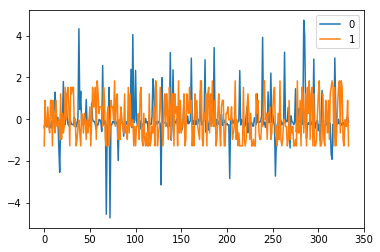

In [17]:
temp = pd.concat([salary_delta18,final_score1617],axis =1).dropna()
test = pd.DataFrame(preprocessing.scale(temp))
print(regression(test.iloc[:,1],test.iloc[:,0]))
test.plot()
#pd.concat([ori_salary18,ori_salary17,salary_delta18],axis =1).dropna()

In [18]:
(stat, beta, const) = regression(final_score1617,salary18)
new_delta = const + beta*final_score1718
new_salary = (new_delta*np.std(ori_salary18)+ori_salary18).dropna()

#+ np.mean(ori_salary18)
test = pd.concat([new_salary,ori_salary18, new_delta,final_score1718],axis = 1).dropna()
test.columns = ['new_salary','salary2018','delta','score']
test

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,new_salary,salary2018,delta,score
aaron gordon,5.959685e+06,5504420.0,0.061158,1.0
al horford,2.910923e+07,27734405.0,0.184687,-5.0
alec burks,1.130077e+07,10845506.0,0.061158,1.0
alex abrines,5.260709e+06,5725000.0,-0.062371,7.0
alex len,4.029826e+06,4187599.0,-0.021194,5.0
alfarouq aminu,8.693856e+06,7319035.0,0.184687,-5.0
alfonzo mckinnie,4.480510e+04,815615.0,-0.103547,9.0
allen crabbe,2.101384e+07,19332500.0,0.225863,-7.0
amir johnson,1.268134e+07,11000000.0,0.225863,-7.0
andre drummond,2.545685e+07,23775506.0,0.225863,-7.0
